# Filters in pycoco

---------------------

## Introduction

This notebook aims to serve as a short tutorial (along with the others in this directory). In this notebook, the tools for adding/testing/plotting filters in `pycoco`, as a companion to the `c` code `CoCo`


In [1]:
from __future__ import print_function ## Force python3-like printing

try:
    from importlib import reload
except:
    pass

%matplotlib inline
from matplotlib import pyplot as plt

import os
import numpy as np

from astropy.table import Table, Column
import astropy.units as u

import pycoco as pcc

reload(pcc) ## FOR DEV


<module 'pycoco' from '/Users/berto/Code/verbose-enigma/pycoco/__init__.py'>

## Using `FilterClass`

### `FilterClass` Methods and Variables

Filters in **`pycoco`** are handled using a **`FilterClass()`**, which has the methods:

**`FilterClass.__init__()`**

**`FilterClass.read_filter_file()`** 

**`FilterClass.calculate_effective_wavelength()`**

**`FilterClass.calculate_edges()`** 

**`FilterClass.plot()`**

**`FilterClass.resample_response()`**

**`FilterClass.calculate_plot_colour()`**


and variables:

**`FilterClass._wavelength_units`**

**`FilterClass._filter_file_path`**

**`FilterClass._upper_edge`**

**`FilterClass._lower_edge`**

**`FilterClass.lambda_effective`**

**`FilterClass.wavelength`**

**`FilterClass.throughput`**


### Loading a Filter

We can use **`pcc.load_filter()`** to intialise a FilterClass instance and load in a response function given a valid path to that filter.
**`pcc.load_filter()`** is essentially a wrapper for the class methods: **read_filter_file()**, **calculate_effective_wavelength()** and **calculate_plot_colour()**.

In [2]:
verbose = False  

filter_filename = "BessellB.dat"
path_to_filter = os.path.join(os.path.abspath(pcc._default_filter_dir_path), filter_filename)

if verbose: print("Path to the filter: ", path_to_filter)

In [3]:
B = pcc.FilterClass()
B.read_filter_file(path_to_filter)

In [4]:
from astropy.table import Table
import astropy.units as u

fmt = "ascii"
names = ("wavelength", "throughput")

data = Table.read(path_to_filter, format = fmt, names = names)
wavelength = data["wavelength"]*u.angstrom

wavelength.to(u.angstrom)

<Quantity [ 3600., 3700., 3800., 3900., 4000., 4100., 4200., 4300., 4400.,
            4500., 4600., 4700., 4800., 4900., 5000., 5100., 5200., 5300.,
            5400., 5500., 5600.] Angstrom>

In [5]:
print(pcc.hex["B"])
print(pcc.hex["BessellB"])

#0000ff
#0000ff


Now we can check that everything has been loaded in automatically.

In [6]:
B.__dict__

{'_cumulative_throughput': <Column name='throughput' dtype='float64' length=21>
              0.0
 0.00312760633862
  0.0170975813178
  0.0762093411176
   0.172122602168
   0.274082568807
   0.378336113428
   0.480296080067
   0.577773144287
   0.666701417848
   0.743849040867
   0.810571309425
   0.866451209341
    0.91065471226
   0.944537114262
   0.969036697248
   0.984674728941
    0.99457881568
   0.999061718098
              1.0
              1.0,
 '_cumulative_throughput_spline': <scipy.interpolate.interpolate.interp1d at 0x10e9dc228>,
 '_filter_file_path': '/Users/berto/Code/CoCo/data/filters/BessellB.dat',
 '_frequency_units': Unit("Hz"),
 '_lower_edge': array(3784.9850746268658),
 '_plot_colour': '#0000ff',
 '_upper_edge': array(5203.284210526318),
 '_wavelength_units': Unit("Angstrom"),
 'data': <Table length=21>
 wavelength throughput
  float64    float64  
 ---------- ----------
     3600.0        0.0
     3700.0       0.03
     3800.0      0.134
     3900.0      0.567
  

Looks good! But we can always check by plotting.

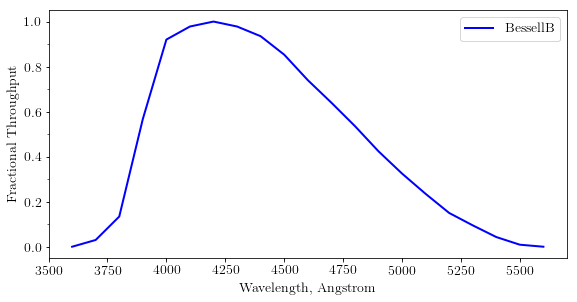

In [7]:
B.plot()

If the effective wavelength of the filter has been calculated, then a colour can be picked from a colourmap. This will come in handy for datasets with more than a few filters. This can be done using **`FilterClass.calculate_plot_colour(...)`**

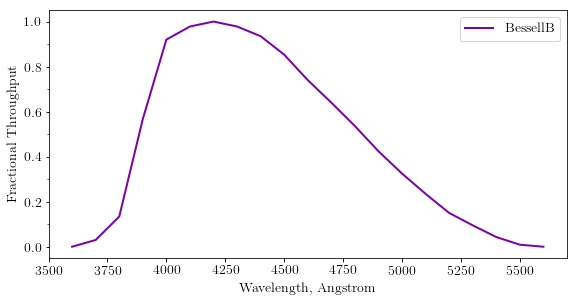

In [8]:
B.calculate_plot_colour()
B.plot()

You can also show the edges of the filter by passing `show_lims = True`. This uses the edges as defined by **`FilterClass.calculate_edges()`** and stored in **`FilterClass._upper_edge`** and
**`FilterClass._lower_edge`**

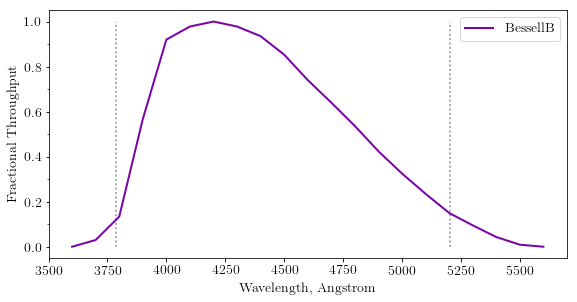

In [9]:
B.plot(show_lims = True)

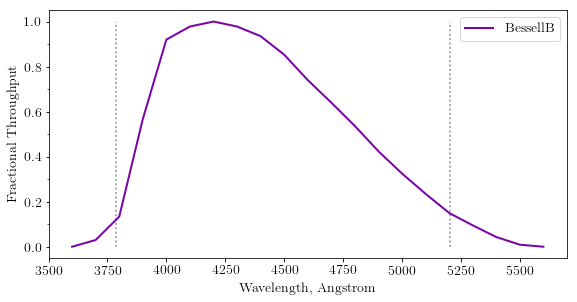

In [10]:
B.plot(show_lims = True)

As well as dealing with the filters in wavelength-space, frequency conversions can also be done. The calculation for effective F_nu especially is useful for making flux unit conversions  

In [11]:
B.calculate_frequency()
B.frequency_u

<Quantity [  8.32756828e+14,  8.10249886e+14,  7.88927521e+14,
             7.68698610e+14,  7.49481145e+14,  7.31201117e+14,
             7.13791567e+14,  6.97191763e+14,  6.81346495e+14,
             6.66205462e+14,  6.51722735e+14,  6.37856294e+14,
             6.24567621e+14,  6.11821343e+14,  5.99584916e+14,
             5.87828349e+14,  5.76523958e+14,  5.65646147e+14,
             5.55171219e+14,  5.45077196e+14,  5.35343675e+14] Hz>

In [12]:
B.calculate_effective_frequency()
B.nu_effective

<Quantity 699311552694397.1 Hz>

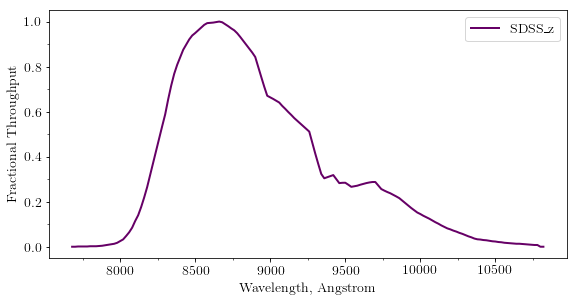

In [13]:
sdssz = pcc.load_filter(path = '/Users/berto/Code/CoCo/data/filters/SDSS_z.dat')
sdssz.plot()

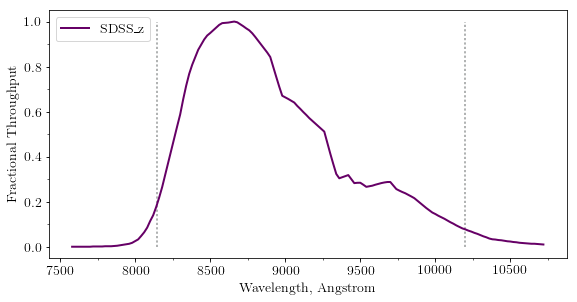

In [14]:
sdssz.resample_response(new_wavelength=sdssz.wavelength - 100*u.angstrom)
sdssz.plot(show_lims = True)

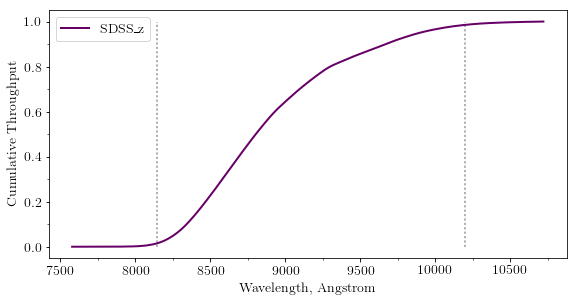

In [15]:
sdssz.plot(cumulative=True, show_lims = True)

## Adding Filters

----

We have shown above how to interact with existing filters, the following steps will take you though adding new filters.

The current best way to load in a new filter is using an `astropy` Table, with the wavelength and throughput as the columns, like so:

In [16]:
## Choose sensible values for wavelength
wavelength = Column(np.linspace(3500, 9000, 100), name = "wavelength", unit = u.angstrom)

## Choose some arbitrary values for the gaussian
throughput = pcc.utils.gaussian(wavelength, 0.8, 6000., 500.)
throughput.name = "throughput"
throughput.unit = None

input_table = Table([wavelength, throughput])

We can now load this in using **`FilterClass.load_table(...)`** and take a look at what it looks like.

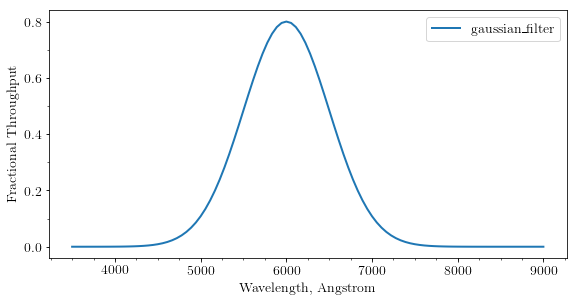

In [17]:
gauss_filter = pcc.FilterClass()
gauss_filter.load_table(input_table,"gaussian_filter")
gauss_filter.plot()

### Saving Filters
---
When we decided everything is as it should be, we can save the throughput to the **`CoCo`** filters directory (or somewhere else, nobody put me in charge).

In [20]:
gauss_filter.save("gaussian_6000_500.dat", squash = True)

has data
No directory specified, assuming /Users/berto/Code/CoCo/data/filters
Overwriting /Users/berto/Code/CoCo/data/filters/gaussian_6000_500.dat


/Users/berto/Code/verbose-enigma/pycoco/classes.py:1010: UserWarning: Found existing file matching /Users/berto/Code/CoCo/data/filters. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + path + ". Run with squash = True to overwrite")


In [ ]:
a

/Users/berto/Code/verbose-enigma/pycoco/classes.py:1954: UserWarning: No self.lambda_effective set.
  warnings.warn("No self.lambda_effective set.")


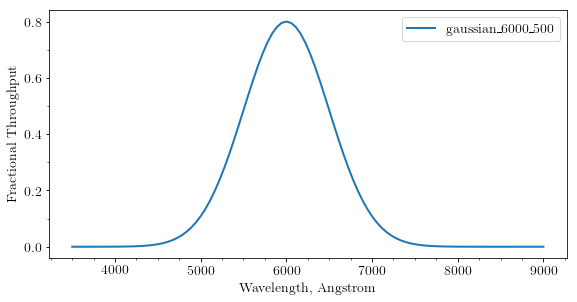

In [22]:
load_gauss_filter = pcc.FilterClass()
load_gauss_filter.read_filter_file(os.path.join(pcc._default_filter_dir_path, "gaussian_6000_500.dat"))
load_gauss_filter.plot()                       